In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv(r"C:\Users\rgorbunov\Documents\ITMO\git_projects\datasets\bukva-dataset\annotations.tsv", sep='\t')
print(data.shape)

(3862, 9)


In [3]:
labels = np.arange(len(data['text'].unique()))
map_dict = {lab: encoded_lab for lab, encoded_lab in zip(sorted(data['text'].unique()), labels)}
data['label_encoded'] = data['text'].map(map_dict)

In [4]:
df_test = data[data['train'] == False].copy()
df_test['split'] = 'test'
df_train_pool = data[data['train'] == True].copy()

In [5]:
X_train, X_val = train_test_split(
    df_train_pool, 
    test_size=0.1, 
    random_state=42, 
    stratify=df_train_pool['text']
)

In [6]:
X_train = X_train.copy()
X_val = X_val.copy()

X_train['split'] = 'train'
X_val['split'] = 'val'

final_df = pd.concat([X_train, X_val, df_test], ignore_index=True)

final_df['train'] = final_df['split'] == 'train'
final_df['val'] = final_df['split'] == 'val'
final_df['test'] = final_df['split'] == 'test'

In [7]:
final_df = final_df[['attachment_id', 'text', 'label_encoded', 'split']]

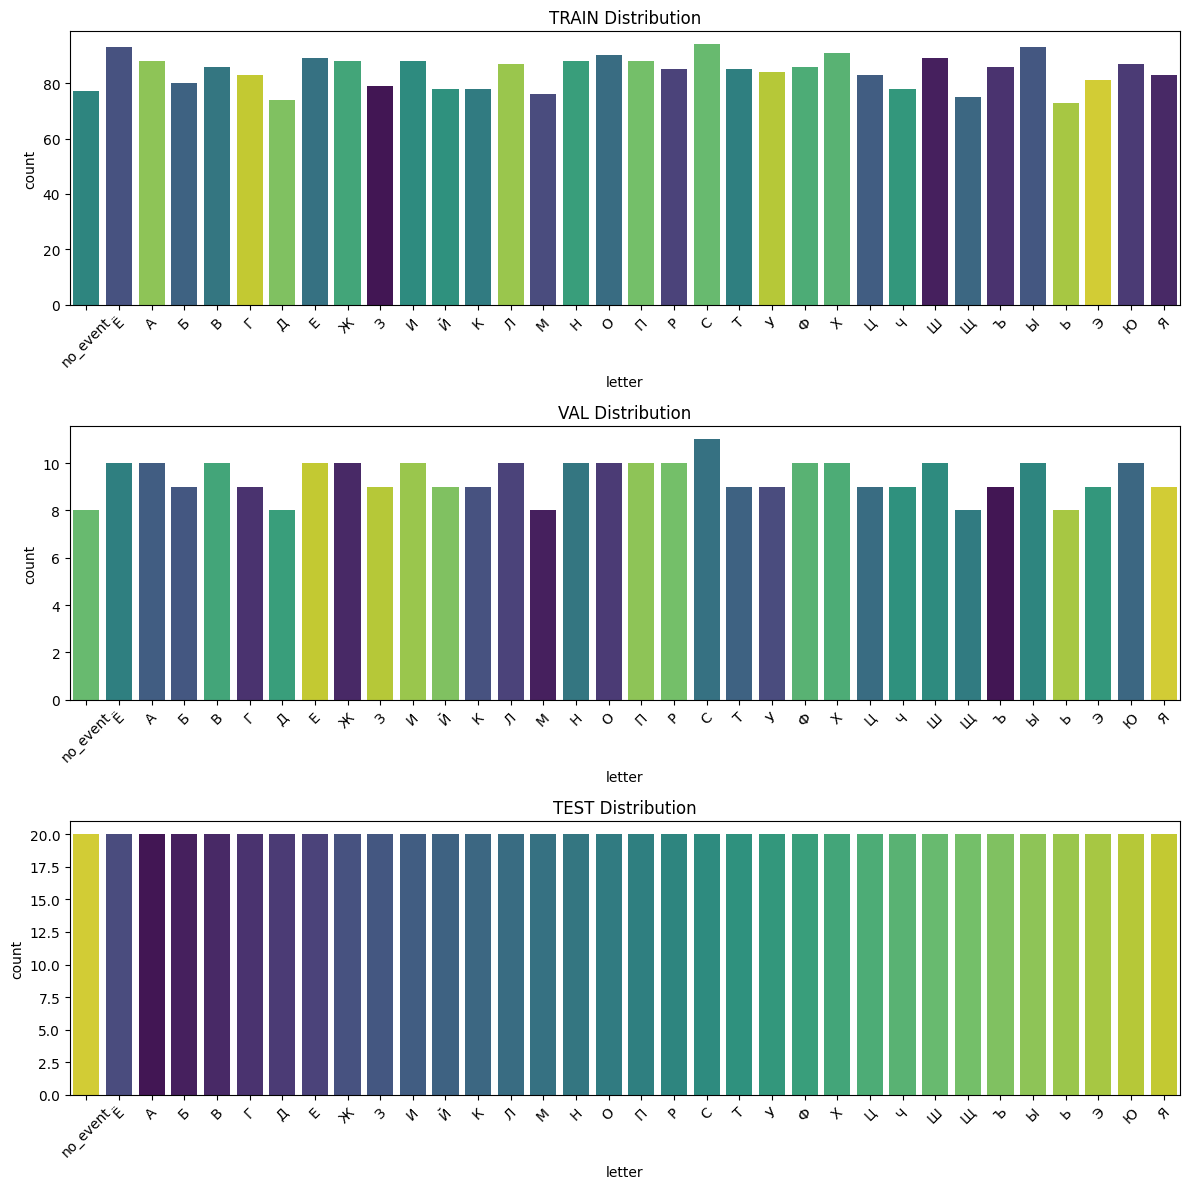

In [25]:
# Настройка визуализации
fig, axes = plt.subplots(3, 1, figsize=(12, 12))
order = sorted(final_df['text'].unique()) # Порядок букв

# 1. График Train
sns.countplot(data=final_df[final_df['split'] == 'train'], x='text', order=order, ax=axes[0], hue='text', palette='viridis', legend=False)
axes[0].set_title('TRAIN Distribution')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xlabel('letter')

# 2. График Val
sns.countplot(data=final_df[final_df['split'] == 'val'], x='text', order=order, ax=axes[1], hue='text', palette='viridis', legend=False)
axes[1].set_title('VAL Distribution')
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xlabel('letter')

# 3. График Test
sns.countplot(data=final_df[final_df['split'] == 'test'], x='text', order=order, ax=axes[2], hue='text', palette='viridis', legend=False)
axes[2].set_title('TEST Distribution')
axes[2].tick_params(axis='x', rotation=45)
axes[2].set_xlabel('letter')

plt.tight_layout()
plt.show()
x=1

In [9]:
final_df['split'].value_counts()

split
train    2863
test      680
val       319
Name: count, dtype: int64

In [10]:
final_df

,attachment_id,text,label_encoded,split
0,19c101b7-56e3-4889-abe2-8a54d392cbda,З,9,train
1,4aca7348-36a8-461c-97dc-ab913552dc16,Ш,26,train
2,023c35a2-deba-4569-b15e-418de9b98f61,Я,33,train
3,920488bb-c284-4afc-b6ae-790266425b57,Ъ,28,train
4,1f1d634900a16db742b507f6bdc0c3dc,Ю,32,train
...,...,...,...,...
3857,no_b458ea12-4097-426e-8f13-9976f62c87db,no_event,0,test
3858,no_c137dd3082afdd3d11c60f1fa73a66f3,no_event,0,test
3859,b46d11a69402158b94741a73cd0eebf8,Б,3,test
3860,c1413ca4f767a1e9bbaeca7120465de9,Ш,26,test


In [ ]:
# Удаление дубликатов по label_encoded (оставляем первое вхождение)
mapping = final_df.drop_duplicates(subset='label_encoded')[['label_encoded', 'text']]

# Сортировка по label_encoded для удобства
mapping = mapping.sort_values('label_encoded').reset_index(drop=True)

#mapping.to_csv('./src/datasets/bukva_label_mapping.csv', index=False)

# Вывод таблицы
print(mapping.to_string(index=False))

 label_encoded     text
             0 no_event
             1        Ё
             2        А
             3        Б
             4        В
             5        Г
             6        Д
             7        Е
             8        Ж
             9        З
            10        И
            11        Й
            12        К
            13        Л
            14        М
            15        Н
            16        О
            17        П
            18        Р
            19        С
            20        Т
            21        У
            22        Ф
            23        Х
            24        Ц
            25        Ч
            26        Ш
            27        Щ
            28        Ъ
            29        Ы
            30        Ь
            31        Э
            32        Ю
            33        Я


In [11]:
#final_df.to_csv('annotations.csv', index=False)